<a href="https://colab.research.google.com/github/kisung2577/CMPE-258/blob/main/Assignment%204/%5Bc%5D_earlystop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [ ]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [ ]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [ ]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X) 
y= df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [ ]:
model = create_model()

In [ ]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.0469 - accuracy: 0.6444 - val_loss: 0.9492 - val_accuracy: 0.7333 - 2s/epoch - 587ms/step
Epoch 2/200
3/3 - 0s - loss: 0.9418 - accuracy: 0.6667 - val_loss: 0.8229 - val_accuracy: 0.7333 - 46ms/epoch - 15ms/step
Epoch 3/200
3/3 - 0s - loss: 0.8129 - accuracy: 0.6667 - val_loss: 0.7110 - val_accuracy: 0.7333 - 39ms/epoch - 13ms/step
Epoch 4/200
3/3 - 0s - loss: 0.7067 - accuracy: 0.6667 - val_loss: 0.5718 - val_accuracy: 0.7333 - 42ms/epoch - 14ms/step
Epoch 5/200
3/3 - 0s - loss: 0.5723 - accuracy: 0.7444 - val_loss: 0.4492 - val_accuracy: 0.9000 - 42ms/epoch - 14ms/step
Epoch 6/200
3/3 - 0s - loss: 0.4435 - accuracy: 0.9111 - val_loss: 0.3379 - val_accuracy: 0.8667 - 39ms/epoch - 13ms/step
Epoch 7/200
3/3 - 0s - loss: 0.3621 - accuracy: 0.8667 - val_loss: 0.2725 - val_accuracy: 0.9000 - 50ms/epoch - 17ms/step
Epoch 8/200
3/3 - 0s - loss: 0.2547 - accuracy: 0.9556 - val_loss: 0.1829 - val_accuracy: 1.0000 - 44ms/epoch - 15ms/step
Epoch 9/200
3/3 - 0s - lo

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

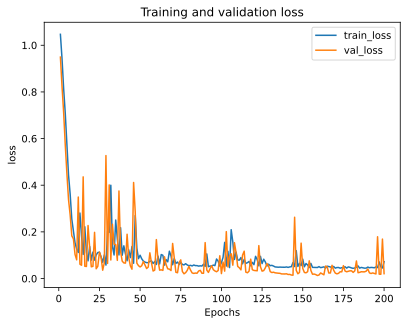

In [ ]:
plot_metric(history, 'loss')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0414 - accuracy: 0.9889 - val_loss: 0.0215 - val_accuracy: 1.0000 - 87ms/epoch - 29ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0437 - accuracy: 0.9889 - val_loss: 0.0248 - val_accuracy: 1.0000 - 38ms/epoch - 13ms/step


In [ ]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0431 - accuracy: 0.9889 - val_loss: 0.0434 - val_accuracy: 1.0000 - 106ms/epoch - 35ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0477 - accuracy: 0.9889 - val_loss: 0.0349 - val_accuracy: 1.0000 - 45ms/epoch - 15ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0441 - accuracy: 0.9889 - val_loss: 0.0245 - val_accuracy: 1.0000 - 43ms/epoch - 14ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0503 - accuracy: 0.9889 - val_loss: 0.0279 - val_accuracy: 1.0000 - 52ms/epoch - 17ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0460 - accuracy: 0.9889 - val_loss: 0.0909 - val_accuracy: 0.9333 - 65ms/epoch - 22ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0542 - accuracy: 0.9778 - val_loss: 0.0242 - val_accuracy: 1.0000 - 39ms/epoch - 13ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0491 - accuracy: 0.9889 - val_loss: 0.0191 - val_accuracy: 1.0000 - 43ms/epoch - 14ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0420 - accuracy: 0.9889 - val_loss: 0.0421 - val_accuracy: 1.0000 - 56ms/epoch - 19ms/step
Epoch 9/200
3/3 - 0s - 

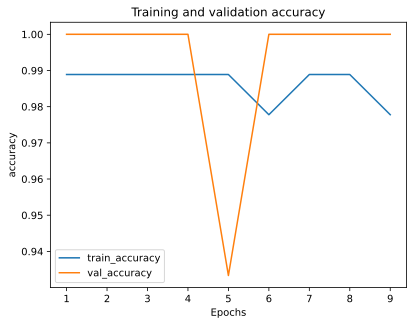

In [ ]:
plot_metric(history, 'accuracy')